### Source from MULTIVARIATE DATA  ANALYSIS Joseph F. Hair Jr., William C. Black, Barry J. Babin, Rolph E. Anderson

### To fit a linear regression, lasso regression model understadning which variables play a role in affecting the likelihood of recommending HBAT

HBAT sells paper products to two market segments: the newsprint industry and the magazine industry. Also, paper products are sold to these market seg ments either directly to the customer or indirectly through a broker. Two types of information were collected in the surveys, for this case the perceptions of customers are considered 

### X20 Likelihood of recommending HBAT (Scale given)
The folliwng are the variables considred 
### X1 - Customer type length of time a particular customer has been buying  1 - Less than 1 year, 2 - between 1 and 5 years, 3- longer than 5 years 
### X2 - Industry type that purchases HBAT prodcts magazine and newspaper industry
#### X6 Product Quality Perceived level of quality of HBAT’s paper products
#### X7 E-Commerce Activities/Web Site Overall image of HBAT’s Web site, especially  user-friendliness
#### X8 Technical Support Extent to which technical support is offered to help solveproduct/service issues
#### X9 Complaint Resolution Extent to which any complaints are resolved in a timely and complete manners
####  X10 Advertising Perceptions of HBAT’s advertising campaigns in all types of media
#### X11 Product Line Depth and breadth of HBAT’s product line to meet  customer needs
####  X12 Salesforce Image Overall image of HBAT’s salesforce
#### X13 Competitive Pricing Extent to which HBAT offers competitive prices
####  X14 Warranty and Claims Extent to which HBAT stands behind its product/service  warranties and claims
#### X15 New Products Extent to which HBAT develops and sells new products
#### X16 Ordering and Billing Perception that ordering and billing is handled efficiently  and correctly
#### X17 Price Flexibility Perceived willingness of HBAT sales reps to negotiate  price on purchases of paper products
#### X18 Delivery Speed Amount of time it takes to deliver the paper products once  an order has been confirmed

In [1]:

import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

### Section B 

2a) Consider the data given in the excel file and the note book file. The following needs to be conducted in terms of data cleaning and analysis. 
Datafile : HBAT data missing1
i)	Read the file and identify the categorical and numerical variable (2 mark)
ii)	Identify the missing values    (2 marks)
iii)	Impute the missing value accordingly (4 marks)
iv)	Encode the categorical variables   (2 marks)


In [2]:
df = pd.read_csv("./Dataset/HBAT+data+missing1.csv")

In [3]:
df.head()

,X1,X2,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X20
0,2,magazine,8.500000,3.900000,2.500000,5.900000,4.800000,4.900000,6.000000,6.800000,4.700000,4.300000,5.000000,5.100000,3.700000,8.000000
1,3,newsprint,8.200000,2.700000,5.100000,7.200000,3.400000,7.900000,3.100000,5.300000,5.500000,4.000000,3.900000,4.300000,4.900000,6.500000
2,3,magazine,9.200000,3.400000,5.600000,5.600000,5.400000,7.400000,5.800000,4.500000,6.200000,4.600000,5.400000,4.000000,4.500000,8.400000
3,1,newsprint,6.400000,3.300000,7.000000,3.700000,4.700000,4.700000,4.500000,8.800000,7.000000,3.600000,4.300000,4.100000,3.000000,6.000000
4,2,magazine,9.000000,3.400000,5.200000,4.600000,2.200000,6.000000,4.500000,NaN,6.100000,4.500000,4.500000,3.500000,3.500000,6.600000


In [4]:
# Checking Missing Values
df.dtypes

X1       int64
X2      object
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X20    float64
dtype: object

###### X2 variable is categorical variable, others are numerical variable. 

In [5]:
# Checking missing values 
df.isnull().sum()

X1     0
X2     0
X6     0
X7     0
X8     0
X9     0
X10    5
X11    0
X12    0
X13    6
X14    0
X15    0
X16    0
X17    0
X18    0
X20    0
dtype: int64

##### X10 and X13 are variables having missing values.

<Axes: xlabel='X10'>

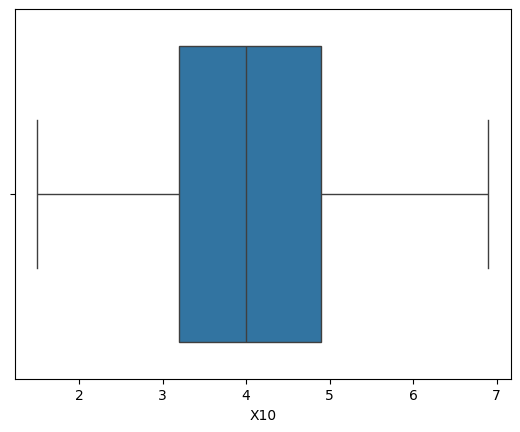

In [6]:
# Missing Value Treatment by visulizing distribution of the data
sns.boxplot(df['X10'], orient='h')

<Axes: xlabel='X13'>

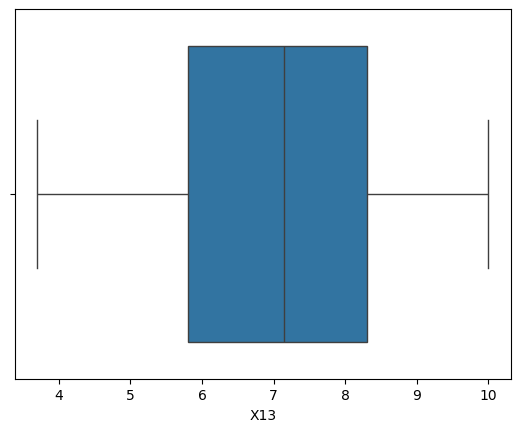

In [7]:
sns.boxplot(df['X13'], orient='h')

##### As there are no outliers is the X10 and X13 variables therefore we can use mean while imputing missing values.

In [8]:
df['X10'] = df['X10'].fillna(df['X10'].mean())

In [9]:
df['X13'] = df['X13'].fillna(df['X13'].mean())

In [10]:
# Validating treatment of missing Values
df.isnull().sum()

X1     0
X2     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X20    0
dtype: int64

##### All missing values have been imputed.

In [11]:
# Encoding the categorical variable using N-1 Encoding
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include='object')

In [12]:
dummy_var = pd.get_dummies(df_cat, drop_first=True)

In [13]:
dummy_var.head()

,X2_newsprint
0,False
1,True
2,False
3,True
4,False


In [14]:
# Converting the Boolean values to integers
dummy_var['X2_newsprint'] = dummy_var['X2_newsprint'].astype(int)

2b) 
I.	Create the train and test data set with suitable y and x variables – 4marks
II.	Develop a linear regression model based on the variables – 6 marks
III.	Is there multicollinearity, based on the output which variables are significant and which are insignificant – 6 marks 
IV.	Compute the VIF for the variables – 4 marks
V.	Based on the variables accordingly remove variables and reconduct analysis  - 6 marks 
VI.	Conclude accordingly using the output and provide which variables would affect the regression model – 4 amrks 


In [15]:
# Train Test Split

y = df_num['X20']

df_num = df_num.drop('X20', axis =1)

In [16]:
X = pd.concat([df_num,dummy_var], axis=1)

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [18]:
X_train = sm.add_constant(X_train)

In [19]:
model = sm.OLS(y_train,X_train).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X20   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.22e-19
Time:                        23:29:02   Log-Likelihood:                -145.63
No. Observations:                 140   AIC:                             323.3
Df Residuals:                     124   BIC:                             370.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4662      1.293     -0.360      0.719      -3.026       2.094
X1              -0.1503      0.144     -1.041      0.300      -0.436       0.135
X6               0.4105      0.076      5.435      0.000       0.261       0.560
X7               0.0422      0.142      0.297      0.767      -0.239       0.323
X8               0.2537      0.072      3.512      0.001       0.111       0.397
X9               0.0607      0.113      0.537      0.592      -0.163       0.284
X10             -0.1486      0.075     -1.990      0.049      -0.296      -0.001
X11              0.4145      0.278      1.490      0.139      -0.136       0.965
X12              0.4530      0.108      4.209      0.000       0.240       0.666
X13             -0.1019      0.051     -1.985      0.049      -0.204      -0.000
X14             -0.3554      0.139     -2.559      0.012      -0.630      -0.080
X15              0.0803      0.046      1.749      0.083      -0.011       0.171
X16              0.0805      0.115      0.699      0.486      -0.147       0.308
X17              0.4672      0.295      1.581      0.116      -0.118       1.052
X18             -0.4077      0.578     -0.705      0.482      -1.553       0.737
X2_newsprint     0.1497      0.137      1.091      0.277      -0.122       0.421
==============================================================================
Omnibus:                        0.417   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.312
Skew:                           0.116   Prob(JB):                        0.856
Kurtosis:                       2.999   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observations:
###### As the Condition Number is 441 which implies there is  significant multicollinearity among variables.
###### Significant variables are X6,X8,X10,X12,X13,X14 as their p value is less than 0.05 (significance level)

In [21]:
X = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

        Variable        VIF
0          const 442.429065
1             X1   3.661242
2             X6   2.818048
3             X7   2.886788
4             X8   4.342281
5             X9   5.193999
6            X10   1.816599
7            X11  33.972784
8            X12   3.707320
9            X13   1.803408
10           X14   4.389025
11           X15   1.152046
12           X16   3.142980
13           X17  31.317970
14           X18  52.800840
15  X2_newsprint   1.239522


##### Conclusion:
###### Based on the observations from VIF values, variables X18, X17, X11 can be removed as they have high correlation. 
###### As (5< VIF >10, means high correlation)
###### Combining the result of  p value scores and VIF values, the variable which will be considered are 
###### X6,X8,X10,X12,X13,X14


2c
Apply Lasso regression and determine the insignificant variables – 10 marks

In [22]:
# Applying Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

print("Lasso Model Coefficient:",lasso.coef_)

Lasso Model Coefficient: [ 0.          0.          0.26907572  0.          0.06649338  0.19403317
  0.          0.07050535  0.27919485 -0.03357333 -0.          0.0299473
  0.04578235  0.          0.          0.        ]


In [23]:
# Applying Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print("Ridge Model Coefficient:", ridge.coef_)

Ridge Model Coefficient: [ 0.         -0.14944805  0.40902304  0.04362562  0.25253951  0.0599892
 -0.14713299  0.39111505  0.45020013 -0.10135746 -0.35303195  0.0802431
  0.07884911  0.44225617 -0.35960041  0.14820541]


### Section C

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

Consider the bank churn data set and analysis the factors which affect churn 
Datafile : bank_churn.csv
By using a logistic regression model 
-	Read the data set and check for missing values  -4 marks
-	Split the data set into train and test – 6 marks 
-	Analyze the data set  and calculate the odd for each of the variable – 10 marks 


In [24]:
# Reading Dataset
bank_data = pd.read_csv("./Dataset/bank_churn.csv")

In [25]:
bank_data.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


In [26]:
# Checking for missing Values
bank_data.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

#### There are no missing values in the dataset.

In [27]:
# Checking Datatypes
bank_data.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [28]:
# Splitting the dataset to Numerical and Categorical Variable 
data_num = bank_data.select_dtypes(include=['int64','float64'])
data_cat = bank_data.select_dtypes(include=['object'])

In [29]:
# Encoding the Categorical Variables via N-1 encoding
dummy_var = pd.get_dummies(data_cat, drop_first=True)

In [30]:
dummy_var.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False


In [31]:
# Converting Boolean values to integers
dummy_var= dummy_var.astype(int)
dummy_var.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [32]:
# Creating X and Y, Closed_Acc is dependent variable here as this dataset is of Bank churn rate.
y = data_num['Closed_Acc']

data_num = data_num.drop('Closed_Acc', axis=1)
X = pd.concat([data_num,dummy_var], axis=1)

In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [34]:
# Applying Logistic Regression via Stats model 

X_train = sm.add_constant(X_train)

model = sm.Logit(y_train,X_train).fit()
model.summary()



Optimization terminated successfully.
         Current function value: 0.440446
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Closed_Acc   No. Observations:                 6944
Model:                          Logit   Df Residuals:                     6934
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.1220
Time:                        23:29:03   Log-Likelihood:                -3058.5
converged:                       True   LL-Null:                       -3483.4
Covariance Type:            nonrobust   LLR p-value:                3.976e-177
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7290      0.287    -12.975      0.000      -4.292      -3.166
CreditScore          -0.0005      0.000     -1.527      0.127      -0.001       0.000
Age                   0.0673      0.003     22.098      0.000       0.061       0.073
NumOfYrsWithBank     -0.0061      0.011     -0.553      0.580      -0.028       0.016
Balance            2.492e-06   6.16e-07      4.047      0.000    1.28e-06     3.7e-06
NumOfProducts        -0.1370      0.057     -2.413      0.016      -0.248      -0.026
HasCrCard             0.0283      0.071      0.400      0.689      -0.110       0.167
Geography_Germany     0.8100      0.080     10.082      0.000       0.652       0.967
Geography_Spain       0.0415      0.084      0.495      0.620      -0.123       0.206
Gender_Male          -0.5969      0.065     -9.241      0.000      -0.724      -0.470
=====================================================================================
"""

In [35]:
odds_ratio = np.exp(model.params)
print(odds_ratio)

const               0.024017
CreditScore         0.999491
Age                 1.069659
NumOfYrsWithBank    0.993887
Balance             1.000002
NumOfProducts       0.872001
HasCrCard           1.028718
Geography_Germany   2.247797
Geography_Spain     1.042391
Gender_Male         0.550513
dtype: float64


In [36]:
# VIF 
vif = pd.DataFrame()
vif['Variables'] = X_train.columns
vif['VIF Value'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF Table:\n",vif)

VIF Table:
            Variables  VIF Value
0              const  80.825475
1        CreditScore   1.000805
2                Age   1.004027
3   NumOfYrsWithBank   1.001298
4            Balance   1.350079
5      NumOfProducts   1.133095
6          HasCrCard   1.001660
7  Geography_Germany   1.347708
8    Geography_Spain   1.127463
9        Gender_Male   1.002641


In [37]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

print(NB_model.score(X_train,y_train))

0.7849942396313364


In [39]:
# y_predict_train = NB_model.predict(X_train)
# y_predict_test = NB_model.predict(X_test)

In [ ]:
#from sklear.metrics import classification_report
#from sklear.metrics import confusion_matrix

#print("Measuring metrics of the Model:")
#print(NB_model.classification_report(y_train,y_predict_train))
#print(NB_model.classification_report(y_test,y_predict_test))

#print("Printing Confusion Matrix of the Model:")
#print(NB_model.classification_report(y_test,y_predict_test))

